In [121]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go  # Latest package for visualization plotly
import plotly.tools as tls
import plotly.figure_factory as ff

# 1. Data Importing

In [122]:
import pandas as pd
Student = pd.read_csv(r"C:\Users\admin\Desktop\Machine Learning\Logistic Regression\4 Logistic Regression using Python\xAPI-Edu-Data.csv")

#first few rows
Student

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Identifying & Treatment Missing Value 

#### 2.1. Data Type and conversion

In [123]:
Student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

#### 2.2. Identifying & Treatment Missing Value

In [124]:
# count the number of NaN values in each column
Student.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

# Data Visualization

# Q1. Visualize just the categorical  features  individually   to see 
#        what options are included and how each option fares when 
#        it comes to count(how many times it appears) and see what
#        can be deduce from that?

In [125]:
Student[Student.select_dtypes(include=['object']).columns] # To check object variables in the dataset

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,No,Bad,Above-7,L


Text(0, 0.5, 'Count')

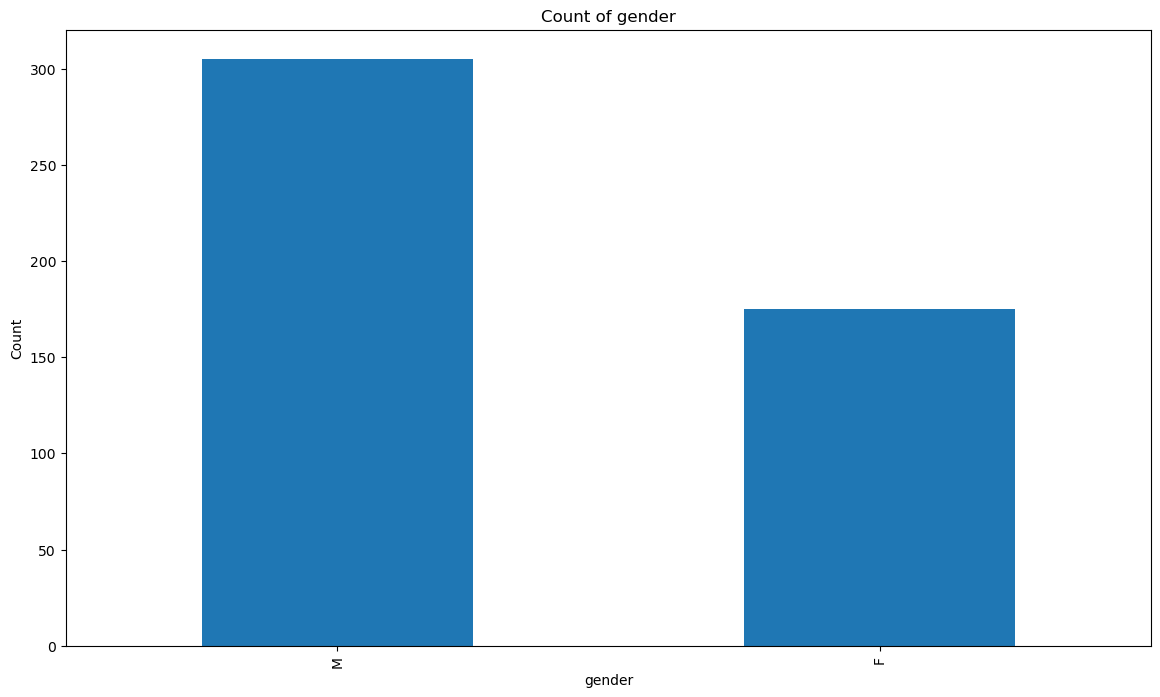

In [126]:
count_plot = Student['gender'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of gender")
count_plot.set_xlabel("gender")
count_plot.set_ylabel("Count")

## * Male students are applying more as compare to Female students

Text(0, 0.5, 'Count')

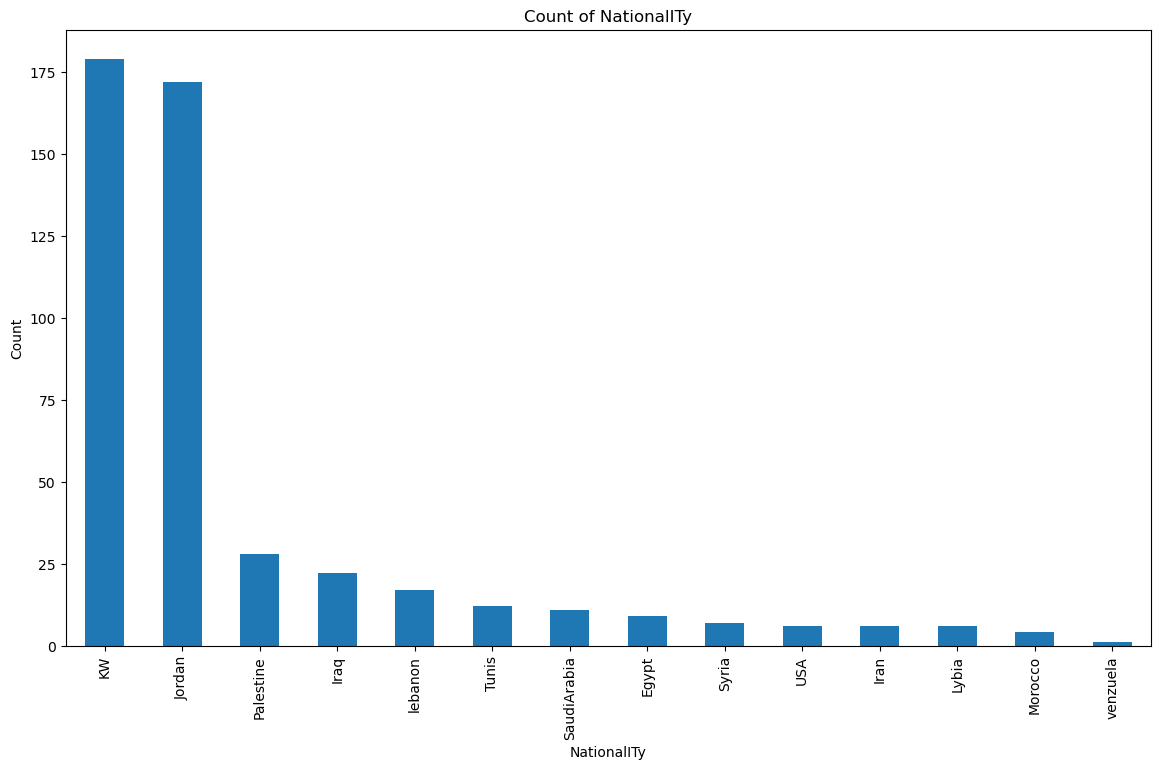

In [127]:
Count_plot = Student['NationalITy'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of NationalITy")
Count_plot.set_xlabel("NationalITy")
Count_plot.set_ylabel("Count")

## * Most of the students are belongs to Kuwait and jordan.

Text(0, 0.5, 'Count')

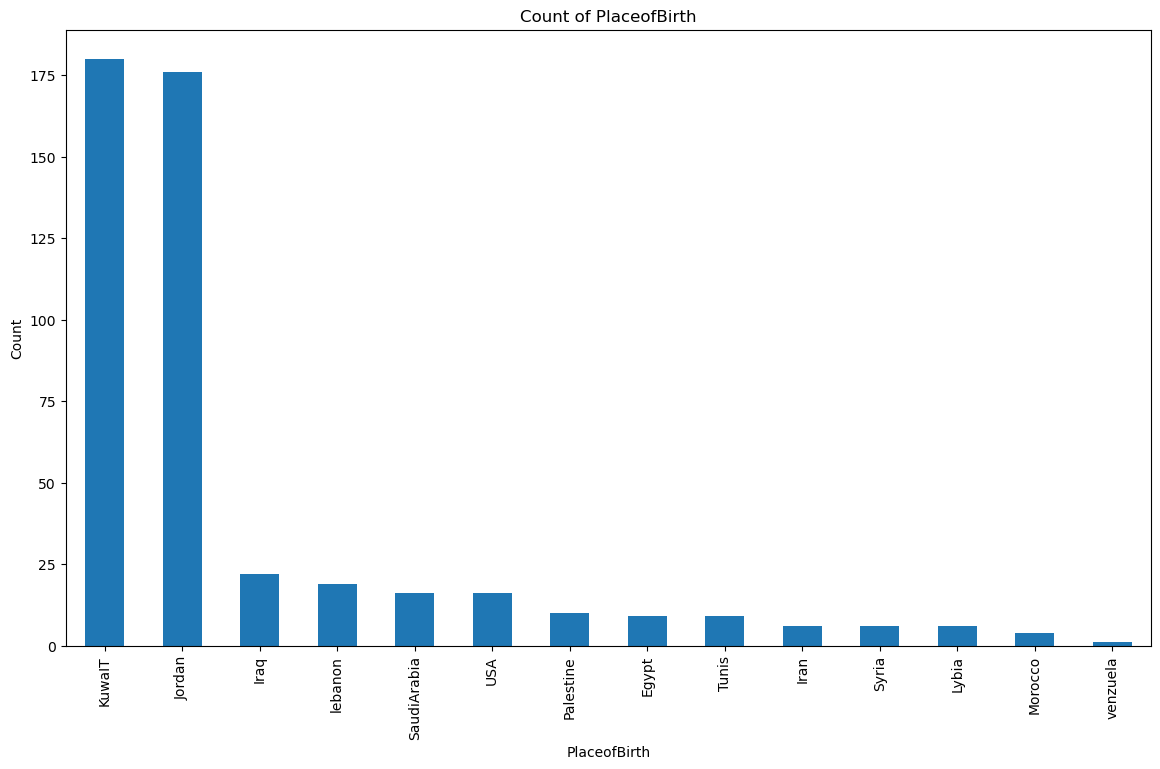

In [128]:
Count_plot = Student['PlaceofBirth'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of PlaceofBirth")
Count_plot.set_xlabel("PlaceofBirth")
Count_plot.set_ylabel("Count")

## * Most of the students are born in Kuwait and jordan.

Text(0, 0.5, 'Count')

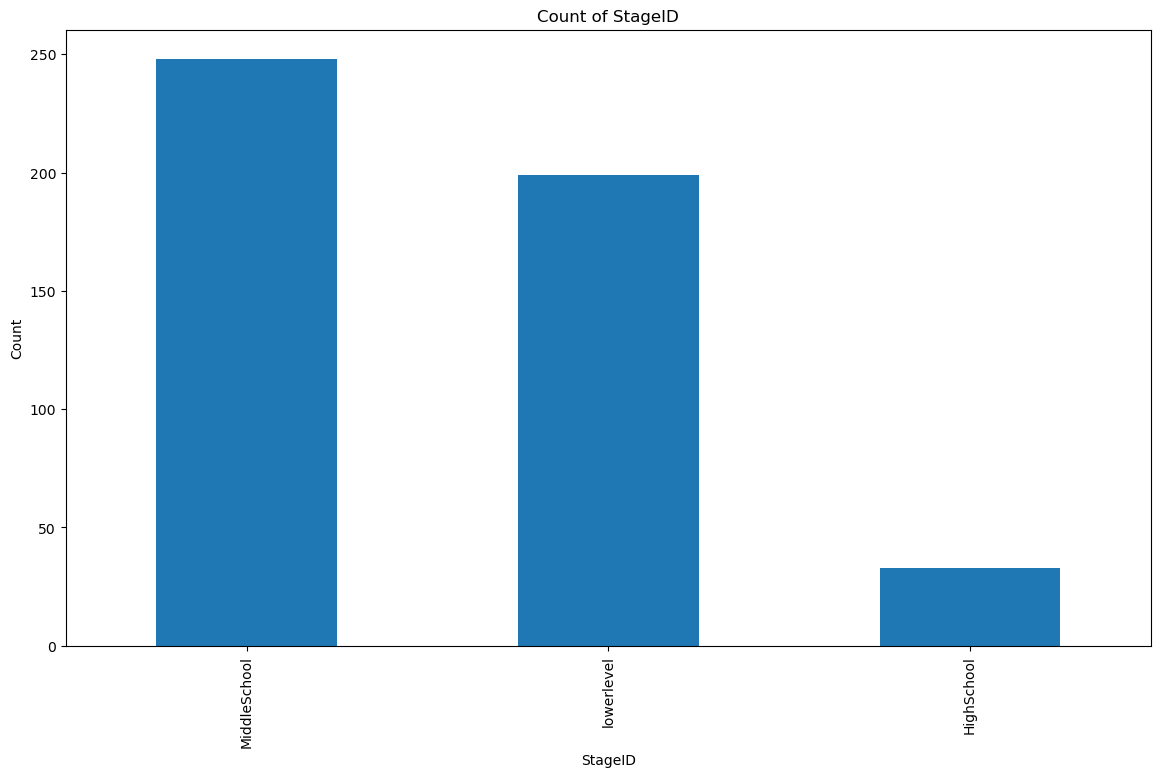

In [129]:
Count_plot = Student['StageID'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of StageID")
Count_plot.set_xlabel("StageID")
Count_plot.set_ylabel("Count")

## * Most of the students are applying for Middleschool and Lowerlevel.

Text(0, 0.5, 'Count')

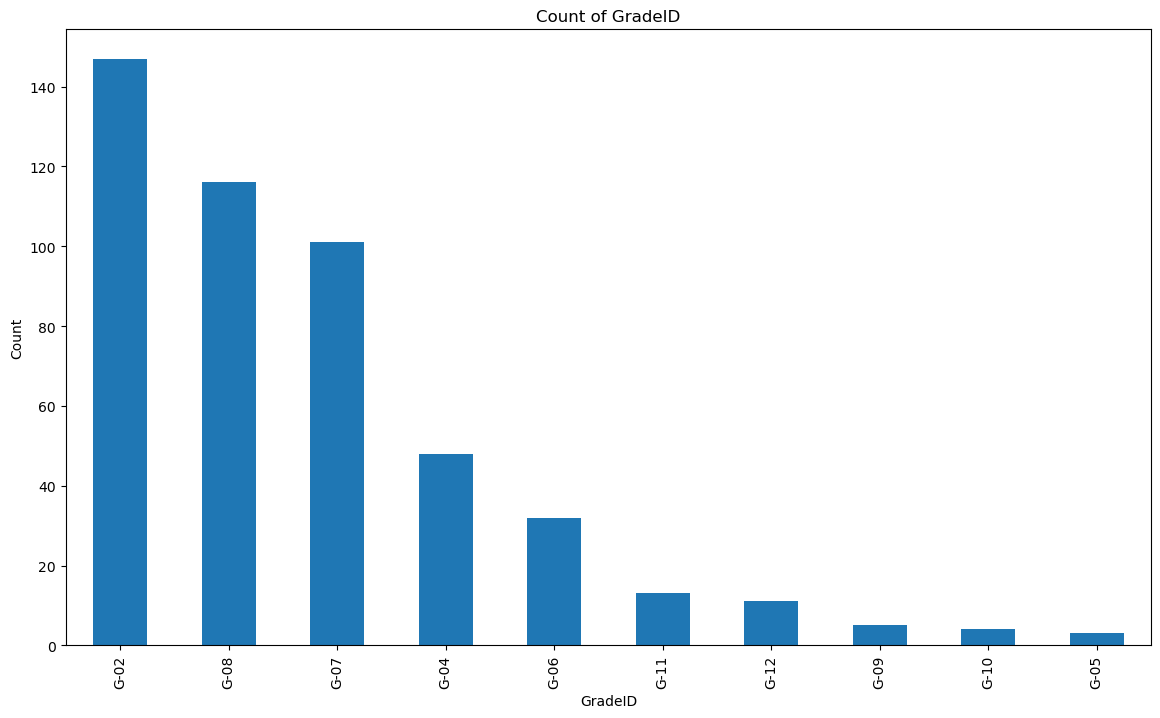

In [130]:
Count_plot = Student['GradeID'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of GradeID")
Count_plot.set_xlabel("GradeID")
Count_plot.set_ylabel("Count")

## * Most of the students are applying for Grade-2, Grade-8,  Grade-7.

Text(0, 0.5, 'Count')

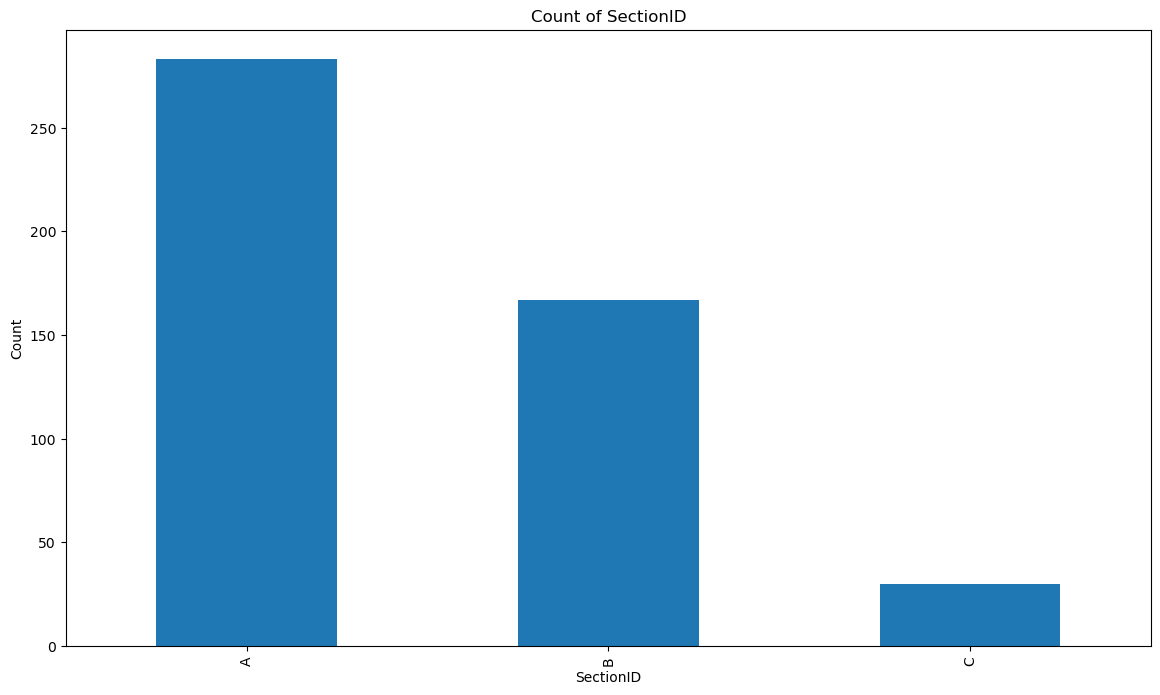

In [131]:
Count_plot = Student['SectionID'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of SectionID")
Count_plot.set_xlabel("SectionID")
Count_plot.set_ylabel("Count")

## * Most of the students are applying for A section.

Text(0, 0.5, 'Count')

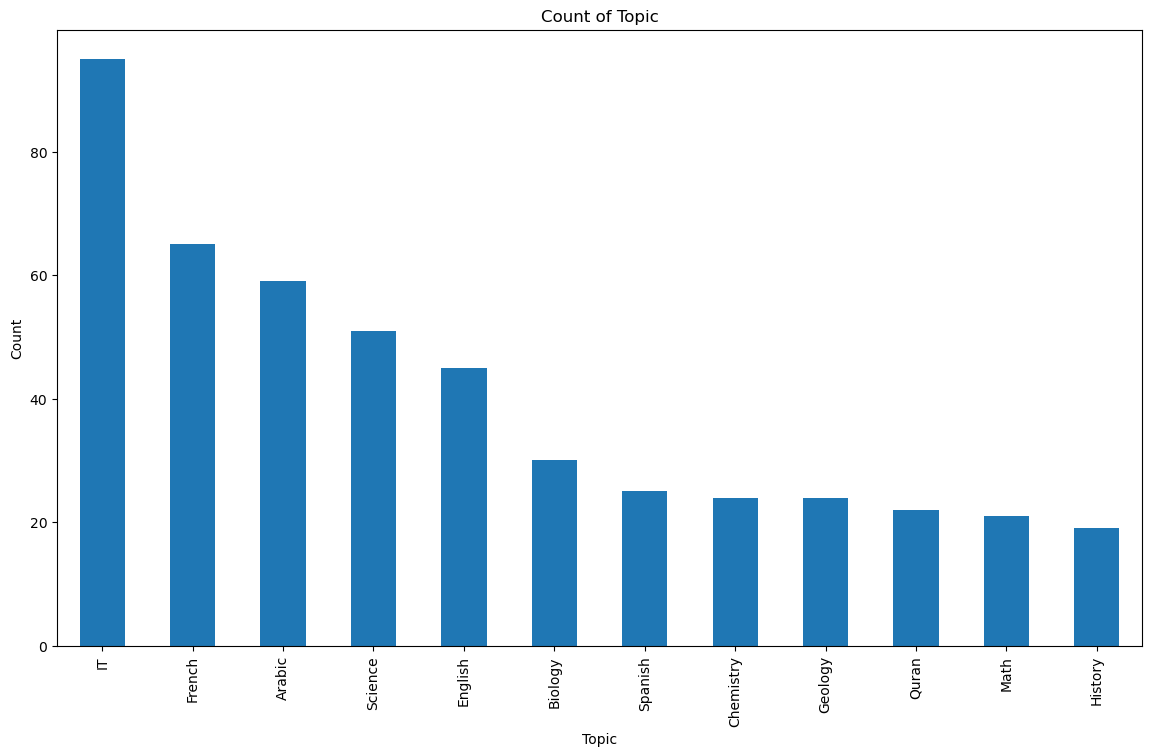

In [132]:
Count_plot = Student['Topic'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Topic")
Count_plot.set_xlabel("Topic")
Count_plot.set_ylabel("Count")

## * Most of the students are applying for IT, French and Arabic Topics.

Text(0, 0.5, 'Count')

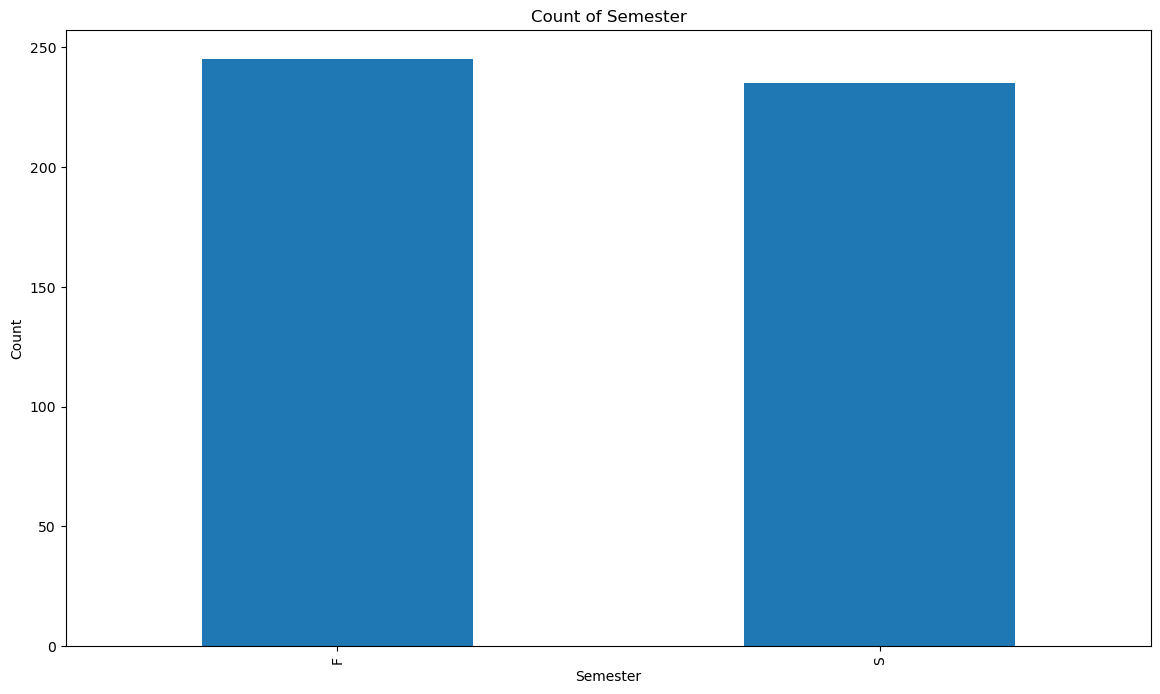

In [133]:
Count_plot = Student['Semester'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Semester")
Count_plot.set_xlabel("Semester")
Count_plot.set_ylabel("Count")

## * Students applying for first and Second Semester are almost equal

Text(0, 0.5, 'Count')

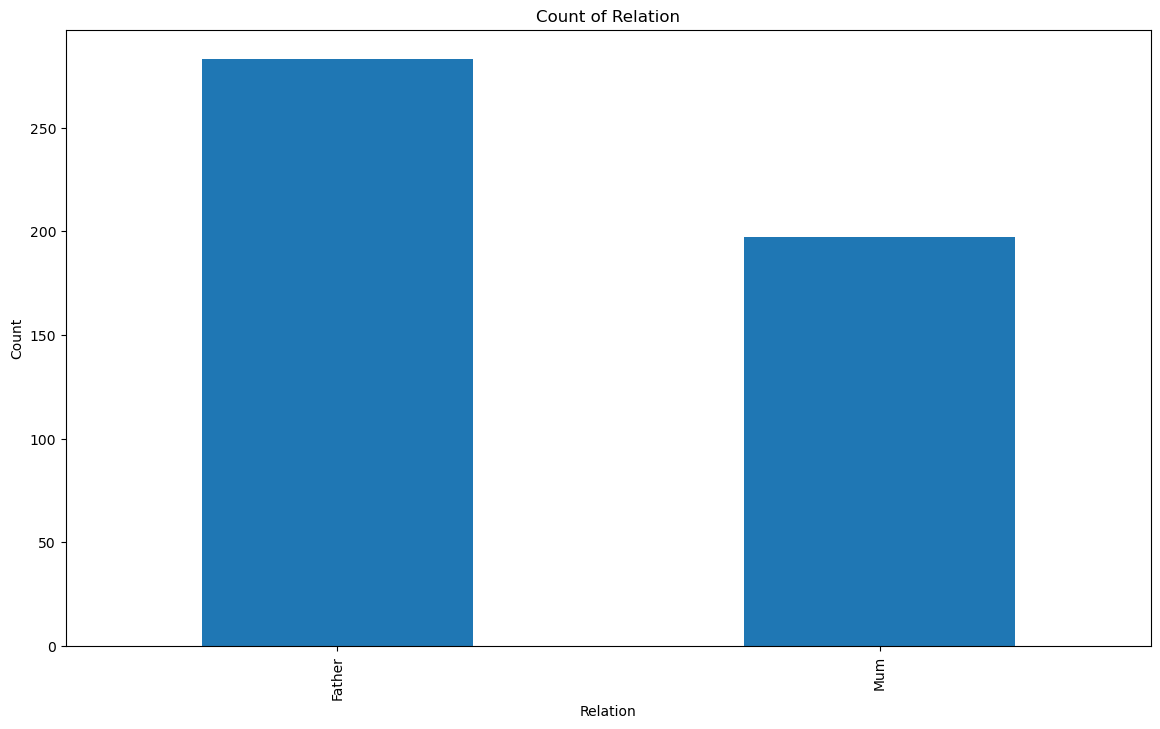

In [134]:
Count_plot = Student['Relation'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Relation")
Count_plot.set_xlabel("Relation")
Count_plot.set_ylabel("Count")

## * Most of the students are suggested father as there parent guide for admission.

Text(0, 0.5, 'Count')

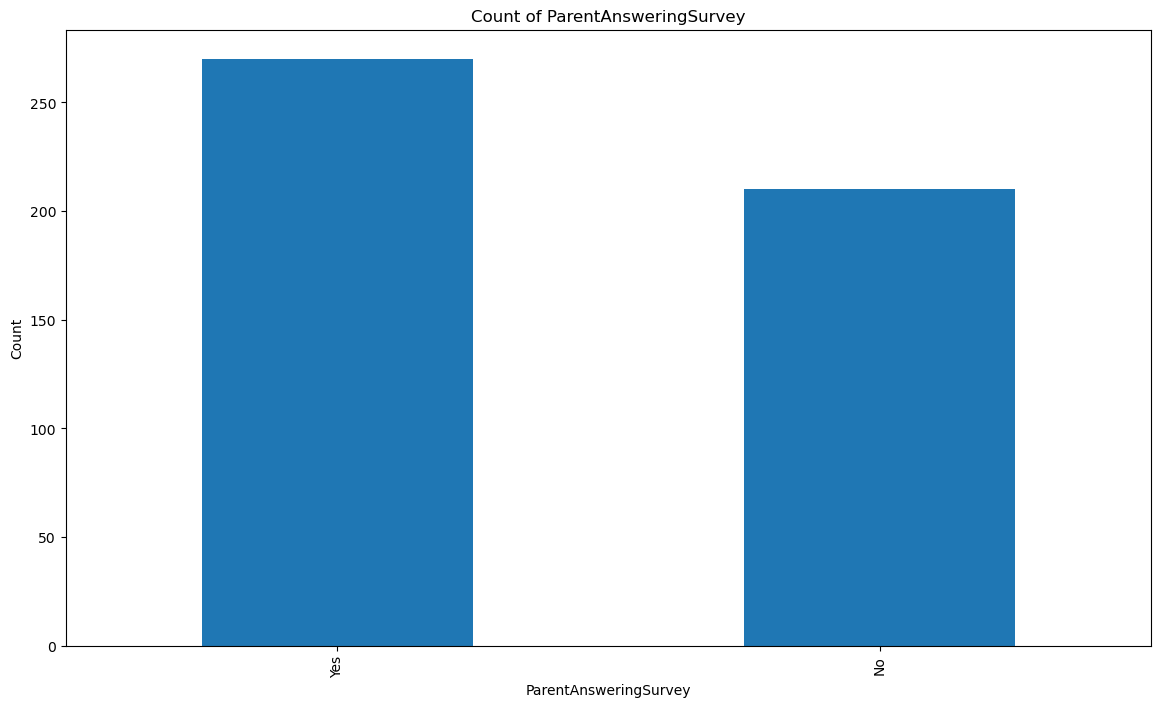

In [135]:
Count_plot = Student['ParentAnsweringSurvey'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of ParentAnsweringSurvey")
Count_plot.set_xlabel("ParentAnsweringSurvey")
Count_plot.set_ylabel("Count")

## * Most of the Parents are responding to surveys.

Text(0, 0.5, 'Count')

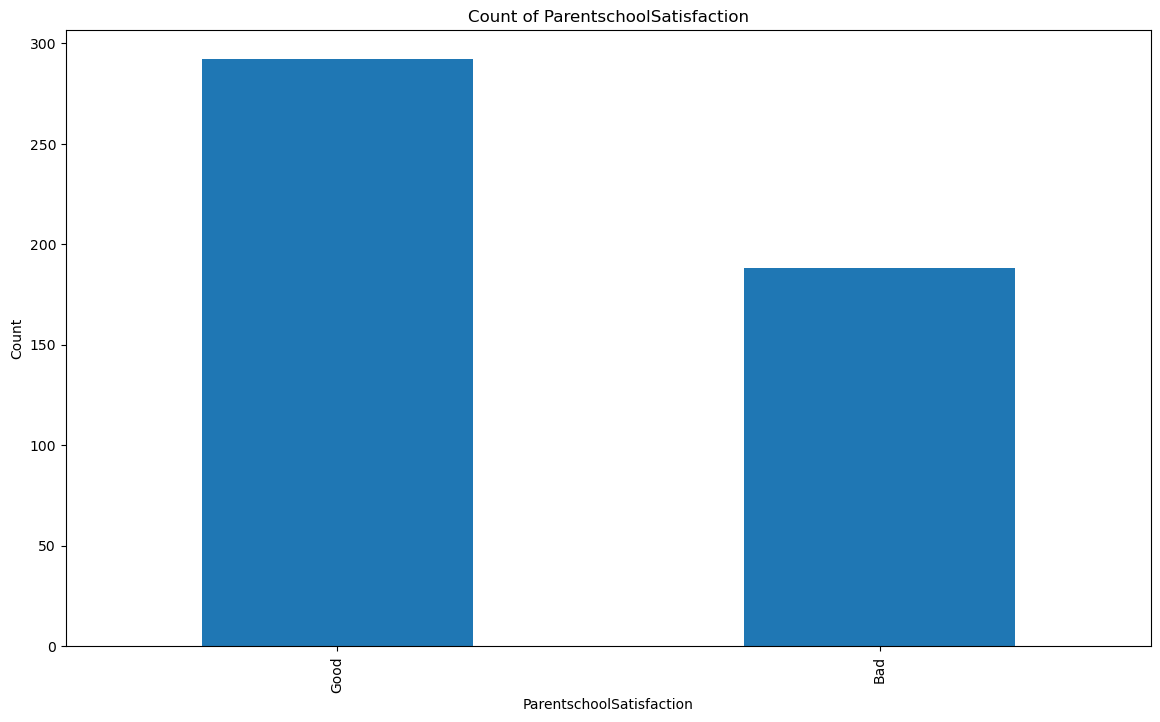

In [136]:
Count_plot = Student['ParentschoolSatisfaction'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of ParentschoolSatisfaction")
Count_plot.set_xlabel("ParentschoolSatisfaction")
Count_plot.set_ylabel("Count")

Text(0, 0.5, 'Count')

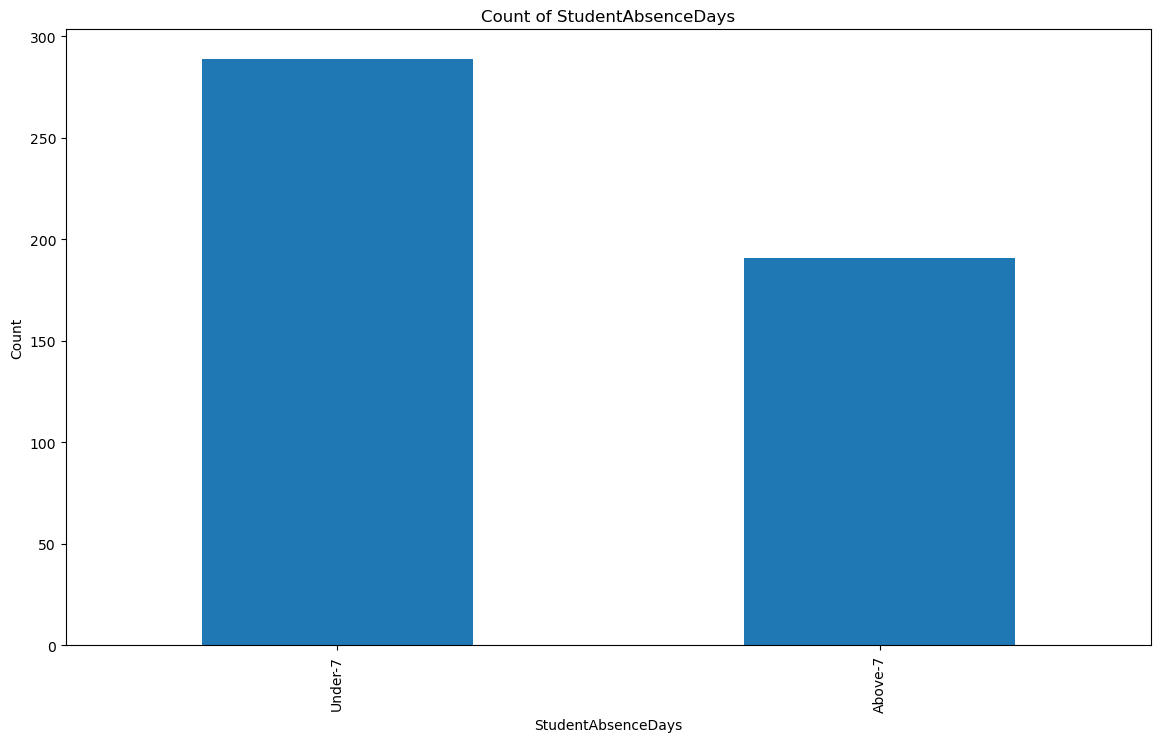

In [137]:
Count_plot = Student['StudentAbsenceDays'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of StudentAbsenceDays")
Count_plot.set_xlabel("StudentAbsenceDays")
Count_plot.set_ylabel("Count")

## * Most of the students are absent for less than 7 days.

Text(0, 0.5, 'Count')

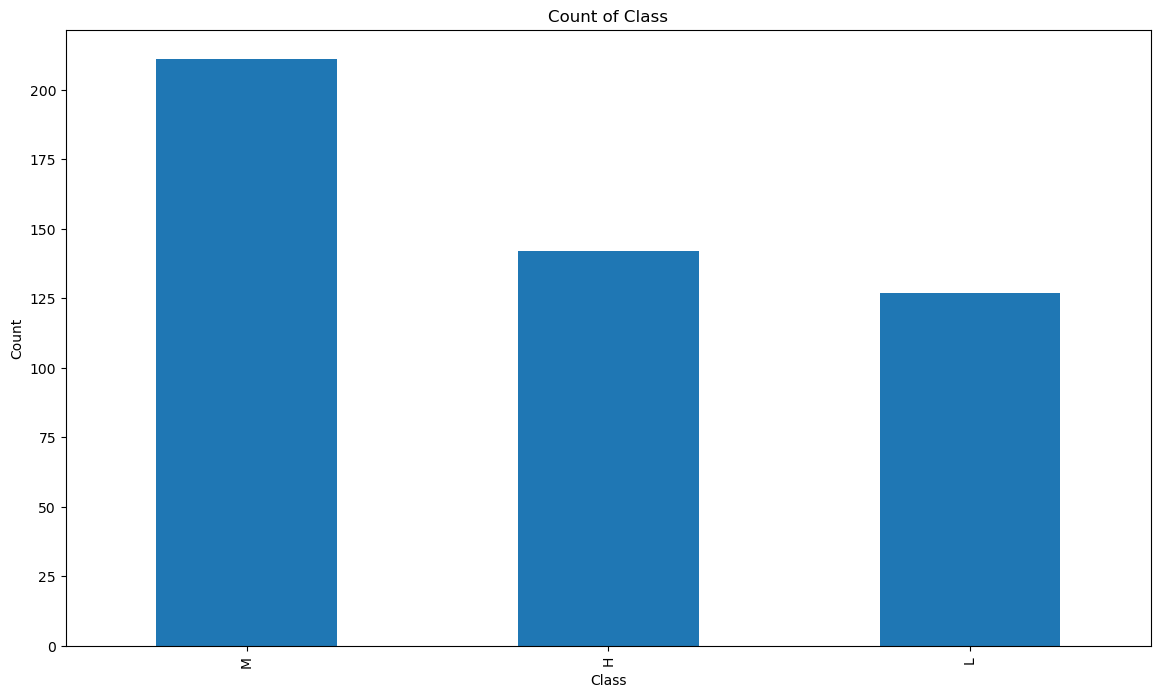

In [138]:
Count_plot = Student['Class'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Count of Class")
Count_plot.set_xlabel("Class")
Count_plot.set_ylabel("Count")

## * Most of the students are applying for Medium Class.

# Q2. Look at some categorical features in relation to each 
#        other, to see what insights could be possibly read?

In [139]:
Student['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

In [140]:
import plotly.express as px

fig = px.pie(Student,names='Class',
             color_discrete_map={'High' : 'red',
                                 'Medium' : 'Blue',
                                 'Low' :'Green'})
fig.show()

* 44 % Students are considered in M-Class (Medium Class) -- 211 Students
* 29.6 % Students are considered in H-Class (High Class) -- 142 Students
* 26.5 % Students are considered in L-Class (Low Class)  -- 127 Students

In [141]:
Class_H= Student[Student["Class"] == "H"]  # 142

Class_H.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
10,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,88,30,80,Yes,Good,Under-7,H
14,F,KW,KuwaIT,MiddleSchool,G-08,A,Math,F,Mum,62,70,44,60,No,Bad,Above-7,H
19,M,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Mum,70,50,40,99,Yes,Good,Under-7,H
30,F,KW,KuwaIT,MiddleSchool,G-08,A,Arabic,F,Father,35,80,50,70,Yes,Good,Under-7,H
47,F,KW,KuwaIT,HighSchool,G-12,A,English,F,Mum,70,4,39,90,Yes,Good,Under-7,H


In [142]:
fig = px.sunburst(Class_H, path=["gender",'Semester',
                                    'ParentAnsweringSurvey', 'ParentschoolSatisfaction', 'StudentAbsenceDays', 'Class'])
fig.show()

### Trend Analysis for Class H
* Male
* First Semester, Yes survey answer, Good response, under-7 days absence.
* Second Semester, Yes survey answer, Good response, under-7 days absence.
#  
* Female
* First Semester, Yes survey answer, Good response, under-7 days absence.
* Second Semester, Yes survey answer, Good response, under-7 days absence.

In [143]:
Class_M= Student[Student["Class"] == "M"]  # 142

Class_M.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M


In [144]:
fig = px.sunburst(Class_M, path=["gender",'Semester',
                                    'ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays', 'Class'])
fig.show()

### Trend Analysis for Class M
* Male
* First Semester, Yes survey answer, Good response, under-7 days absence.
* First Semester, Yes survey answer, Good response, above-7 days absence.
* Second Semester, Yes survey answer, Good response, under-7 days absence.
* First Semester, Yes survey answer, Good response, above-7 days absence.
##  
* Female
* First Semester, Yes survey answer, Good response, under-7 days absence.
* First Semester, Yes survey answer, Good response, above-7 days absence.
* Second Semester, Yes survey answer, Good response, under-7 days absence.
* First Semester, Yes survey answer, Good response, above-7 days absence.

In [145]:
Class_L= Student[Student["Class"] == "L"]  # 142

Class_L.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
12,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,5,1,0,11,No,Bad,Above-7,L
13,M,lebanon,lebanon,MiddleSchool,G-08,A,Math,F,Father,20,14,12,19,No,Bad,Above-7,L


In [146]:
fig = px.sunburst(Class_L, path=["gender",'Semester',
                                    'ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays', 'Class'])
fig.show()

### Trend Analysis for Class L
* Male
* First Semester, No survey answer, Bad response, Above-7 days absence.
* Second Semester, No survey answer, Bad response, Above-7 days absence.
#  
* Female
* First Semester, No survey answer, Bad response, Above-7 days absence.
* Second Semester, No survey answer, Bad response, Above-7 days absence.

# Q3. Visualize categorical variables with numerical variables 
#        and give conclusions?

In [147]:
Student.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## Class vs Numerical Variable Bar Plot

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

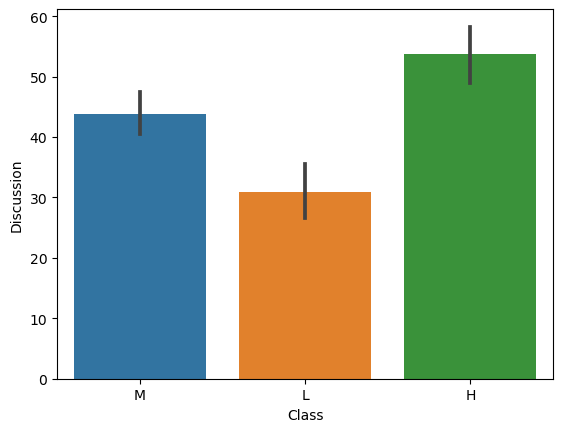

In [148]:
sns.barplot(x='Class',y='Discussion',data=Student)

<AxesSubplot:xlabel='Class', ylabel='AnnouncementsView'>

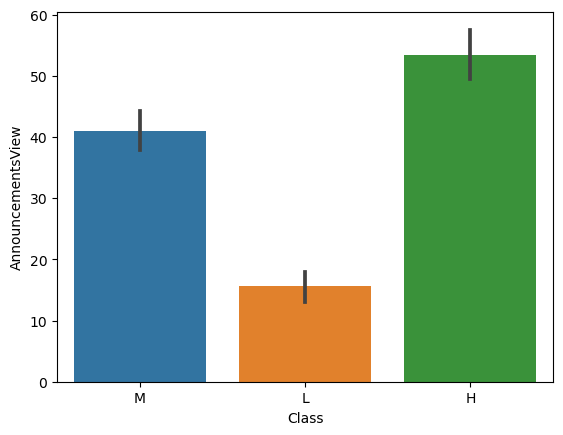

In [149]:
sns.barplot(x='Class',y='AnnouncementsView',data=new)

<AxesSubplot:xlabel='Class', ylabel='VisITedResources'>

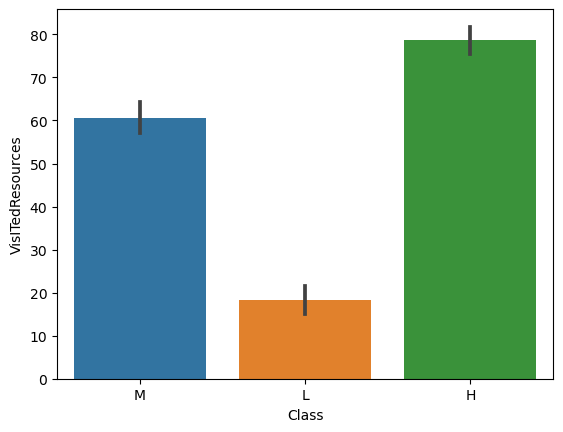

In [150]:
sns.barplot(x='Class',y='VisITedResources',data=new)

<AxesSubplot:xlabel='Class', ylabel='raisedhands'>

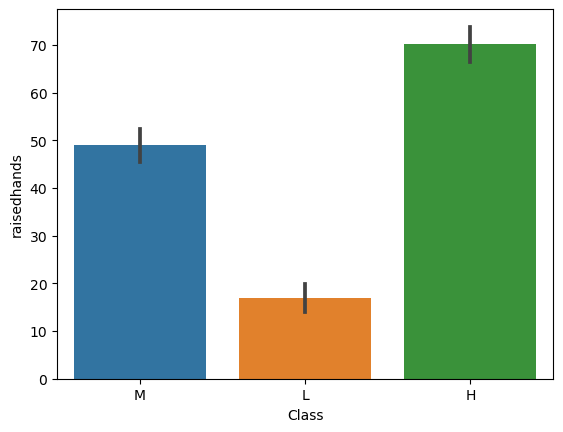

In [151]:
sns.barplot(x='Class',y='raisedhands',data=new)

# Insight :
### * Students with high values in raisedhands, VisITedResources, AnnouncementsView, Discussion are considered in High Class.


# StudentAbsenceDays vs Numerical Variable Plot

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='Discussion'>

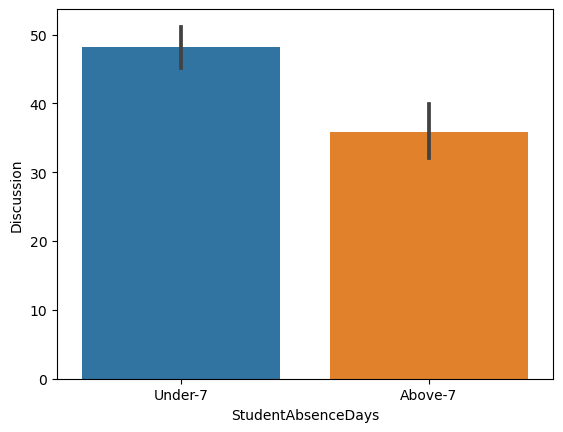

In [152]:
sns.barplot(x='StudentAbsenceDays',y='Discussion',data=new)

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='AnnouncementsView'>

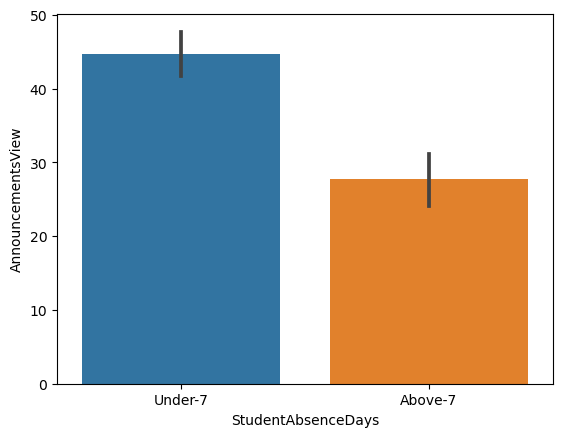

In [153]:
sns.barplot(x='StudentAbsenceDays',y='AnnouncementsView',data=new)

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='VisITedResources'>

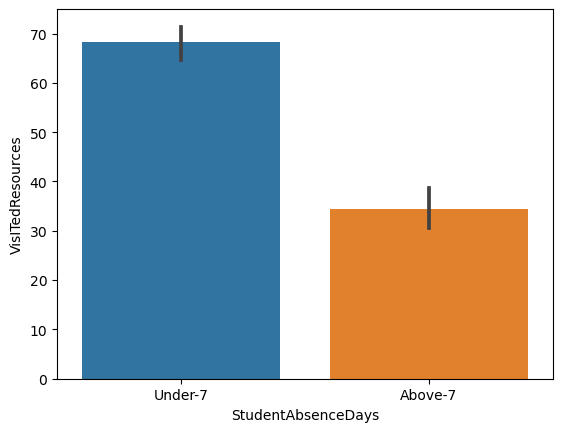

In [154]:
sns.barplot(x='StudentAbsenceDays',y='VisITedResources',data=new)

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='raisedhands'>

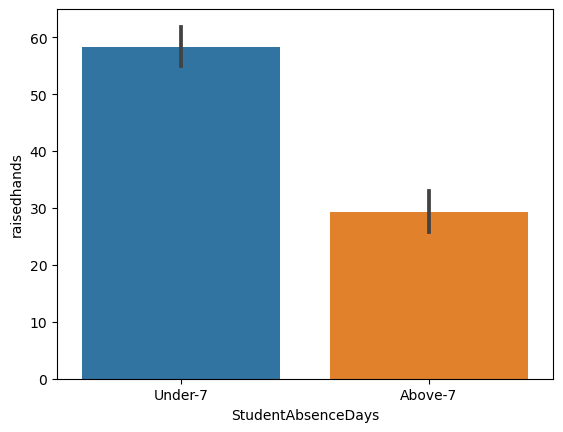

In [155]:
sns.barplot(x='StudentAbsenceDays',y='raisedhands',data=new)

# Insight :
### * Students with high values in raisedhands, VisITedResources, AnnouncementsView, Discussion are absent for less than 7 days.

# Q4. From the above result, what are the factors that leads to 
#        get low grades of the students ?

## Factors that are responsible for getting low grades of the students.
###  1. Student Absence Days :
####                  - Students absent for more than 7 days (Above-7) leads to get low score.
###  2. raisedhands          :
####                -  Students raised hands less, leads to get Low score.
###  3. VisITedResources     :
####                  -  Students visited resources ver less, leads to get low score.
###  4. AnnouncementsView    :
####                  - Students didnt view announcements, leads to get low score.
###  5. Discussion           :
####                  - Students involved less in discussion, leads to get low score.


### Trend Analysis for Class Low grades (Categorical Variables)
### * Male
#### * - First Semester, No survey answer, Bad response, Above-7 days absence.
#### * - Second Semester, No survey answer, Bad response, Above-7 days absence.
#  
### * Female
#### * - First Semester, No survey answer, Bad response, Above-7 days absence.
#### * - Second Semester, No survey answer, Bad response, Above-7 days absence.


# Q5. Build classification model and present it's classification report?

## Model building 

## Hypothesis

* H0 :- There is no log linear relationship between Class and all independent Variable

Vs 

* H1 :- There is log linear relationship between Class and all independent Variable

Alpha = 0.05 (5%)

# Breaking Data into Two Part
 * Quantitative Variable
 * Qualitative Variable
 

In [156]:
Student.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [157]:
# Quantitative Variable (Numerical Variables)
Quantitative_Variable = Student[Student.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30


In [158]:
# Qualitative Variable (Object Variables)
Qualitative_Variable = Student[Student.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L


### Converting qualitative Variable into number

In [159]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) # label in ascending order
Qualitative_Variable.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,1,1,1,2
1,1,4,4,2,1,0,7,0,0,1,1,1,2
2,1,4,4,2,1,0,7,0,0,0,0,0,1
3,1,4,4,2,1,0,7,0,0,0,0,0,1
4,1,4,4,2,1,0,7,0,0,0,0,0,2


## Combining the data set 

In [160]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,4,4,2,1,0,7,0,0,1,1,1,2,15,16,2,20
1,1,4,4,2,1,0,7,0,0,1,1,1,2,20,20,3,25
2,1,4,4,2,1,0,7,0,0,0,0,0,1,10,7,0,30
3,1,4,4,2,1,0,7,0,0,0,0,0,1,30,25,5,35
4,1,4,4,2,1,0,7,0,0,0,0,0,2,40,50,12,50


# Data Partition 

In [161]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = Final_combined.drop('Class', axis = 1)
Y = Final_combined[['Class']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=881)

# Logistics Regression

In [162]:
from sklearn.linear_model import LogisticRegression  #Linear model include all the regression models
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(X_train, y_train) # model

In [163]:
output.intercept_  # beta 0

array([-0.74079357,  0.62315077,  0.1176428 ])

In [164]:
output.coef_  # Beta 1 -- 

array([[-1.03067343, -0.12739986,  0.16383329, -1.40245575, -0.41191674,
        -0.0116455 , -0.03665792, -0.26589088,  0.56880395,  0.46161615,
         0.1815268 ,  0.97712544,  0.02768741,  0.01864566,  0.01211879,
         0.0117483 ],
       [ 0.88967389,  0.19171972, -0.2050093 ,  1.26234143,  0.38533002,
         0.06639958, -0.02390749,  0.48953588,  0.05228768, -0.43063504,
        -0.10652595, -1.25043777, -0.03170457, -0.02468827, -0.02492359,
        -0.0096513 ],
       [ 0.14099954, -0.06431986,  0.04117601,  0.14011432,  0.02658672,
        -0.05475408,  0.06056541, -0.22364501, -0.62109163, -0.03098111,
        -0.07500085,  0.27331233,  0.00401717,  0.00604261,  0.0128048 ,
        -0.002097  ]])

In [165]:
output.feature_names_in_

array(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'raisedhands', 'VisITedResources',
       'AnnouncementsView', 'Discussion'], dtype=object)

# Step 6 : Predictions on Train Dataset

In [166]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
62,1,13,13,0,7,0,7,0,1,1,1,1,80,90,70,80,0
233,0,3,3,1,4,1,10,1,1,1,1,0,32,80,58,46,2
433,1,3,8,1,5,0,5,1,0,0,0,1,87,79,73,98,2
312,0,3,3,2,1,1,10,0,1,1,1,1,55,79,44,43,0
19,1,4,4,1,4,1,7,0,1,1,1,1,70,50,40,99,0


In [167]:
train['Predicted']=output.predict_proba(X_train)[:,1]  # answer in terms of probability.
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted
62,1,13,13,0,7,0,7,0,1,1,1,1,80,90,70,80,0,0.000161
233,0,3,3,1,4,1,10,1,1,1,1,0,32,80,58,46,2,0.037880
433,1,3,8,1,5,0,5,1,0,0,0,1,87,79,73,98,2,0.000412
312,0,3,3,2,1,1,10,0,1,1,1,1,55,79,44,43,0,0.002148
19,1,4,4,1,4,1,7,0,1,1,1,1,70,50,40,99,0,0.005493


In [168]:
train['Predicted2']=output.predict(X_train)  # answer in terms of Label encoder.
train.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted,Predicted2
62,1,13,13,0,7,0,7,0,1,1,1,1,80,90,70,80,0,0.000161,0
233,0,3,3,1,4,1,10,1,1,1,1,0,32,80,58,46,2,0.037880,2
433,1,3,8,1,5,0,5,1,0,0,0,1,87,79,73,98,2,0.000412,2
312,0,3,3,2,1,1,10,0,1,1,1,1,55,79,44,43,0,0.002148,0
19,1,4,4,1,4,1,7,0,1,1,1,1,70,50,40,99,0,0.005493,0


# Step 7 : Model Performance Metrics

In [169]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted2'], train['Class'])
matrix

array([[ 66,   0,  22],
       [  1,  79,   9],
       [ 35,  12, 112]], dtype=int64)

In [170]:
Accuracy_Train=((257)/(336)*100)
print(Accuracy_Train)

76.48809523809523


* Accuracy of Model is 76% , So we say Model good fit data.  

In [171]:
from sklearn.metrics import classification_report
print(classification_report(train['Class'],train['Predicted2']))

              precision    recall  f1-score   support

           0       0.75      0.65      0.69       102
           1       0.89      0.87      0.88        91
           2       0.70      0.78      0.74       143

    accuracy                           0.76       336
   macro avg       0.78      0.77      0.77       336
weighted avg       0.77      0.76      0.76       336



* H is 0
* L is 1
* M is 2

* Accuracy of  Model is 76%, Hence Model is good Fit.
* Accuracy of High student Capture by Model is 65%  ( Sensitivity )
* Accuracy of Low student Capture by Model is 87%  ( Sensitivity )
* Accuracy of Medium student Capture by Model is 78%  ( Sensitivity )

* Specificity of H Class = 90.5 % 
* Specificity of L Class = 96 % 
* Specificity of M Class = 75 % 

# Step 8 : Predictions on Test Dataset

In [172]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
325,1,9,9,2,0,0,4,1,0,0,0,1,27,20,33,35,2
402,1,3,3,1,4,0,1,0,0,0,1,1,76,81,80,86,0
56,1,11,11,1,5,1,8,0,0,1,1,0,19,5,4,1,1
220,1,12,12,1,5,2,11,1,0,1,1,1,77,69,41,13,2
107,1,4,4,2,0,1,7,0,0,1,0,1,70,90,41,33,0


In [173]:
test['Predicted2']=output.predict(X_test)
test.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted2
325,1,9,9,2,0,0,4,1,0,0,0,1,27,20,33,35,2,2
402,1,3,3,1,4,0,1,0,0,0,1,1,76,81,80,86,0,2
56,1,11,11,1,5,1,8,0,0,1,1,0,19,5,4,1,1,1
220,1,12,12,1,5,2,11,1,0,1,1,1,77,69,41,13,2,2
107,1,4,4,2,0,1,7,0,0,1,0,1,70,90,41,33,0,2


# Step 9 : Model Performance Metrics on Test data 

In [174]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Predicted2'],test['Class'])
print(matrix)

[[25  0 11]
 [ 1 32  7]
 [14  4 50]]


In [175]:
Accuracy_test=((107)/(144)*100)
Accuracy_test

74.30555555555556

In [176]:
from sklearn.metrics import classification_report
print(classification_report(test['Class'],test['Predicted2']))

              precision    recall  f1-score   support

           0       0.69      0.62      0.66        40
           1       0.80      0.89      0.84        36
           2       0.74      0.74      0.74        68

    accuracy                           0.74       144
   macro avg       0.74      0.75      0.75       144
weighted avg       0.74      0.74      0.74       144



* Accuracy of  Model is 74%,Hence Model is good Fit  
* Accuracy of High student Capture by Model is 62%  ( Sensitivity )
* Accuracy of Low student Capture by Model is 89%  ( Sensitivity )
* Accuracy of Medium student Capture by Model is 74%  ( Sensitivity )

* Specificity of H Class = 89 % 
* Specificity of L Class = 93 % 
* Specificity of M Class = 76 % 

# Coefficient 

* For future Prediction below 4 variable data is mandatory 

* Note :- If anyone is not present output will not be reliable 

In [177]:
Model_Values=pd.DataFrame(output.intercept_,index=['Intercept1', 'Intercept2', 'Intercept3'],columns=['Coefficient1'])
Model_Values

,Coefficient1
Intercept1,-0.740794
Intercept2,0.623151
Intercept3,0.117643


In [178]:
abc=pd.DataFrame(output.coef_.T,index=output.feature_names_in_,columns=['Coefficient1', 'Coefficient2', 'Coefficient3'])
abc

,Coefficient1,Coefficient2,Coefficient3
gender,-1.030673,0.889674,0.141000
NationalITy,-0.127400,0.191720,-0.064320
PlaceofBirth,0.163833,-0.205009,0.041176
StageID,-1.402456,1.262341,0.140114
GradeID,-0.411917,0.385330,0.026587
SectionID,-0.011645,0.066400,-0.054754
Topic,-0.036658,-0.023907,0.060565
Semester,-0.265891,0.489536,-0.223645
Relation,0.568804,0.052288,-0.621092
ParentAnsweringSurvey,0.461616,-0.430635,-0.030981


In [179]:
Model_Values.append(abc)

,Coefficient1,Coefficient2,Coefficient3
Intercept1,-0.740794,NaN,NaN
Intercept2,0.623151,NaN,NaN
Intercept3,0.117643,NaN,NaN
gender,-1.030673,0.889674,0.141000
NationalITy,-0.127400,0.191720,-0.064320
PlaceofBirth,0.163833,-0.205009,0.041176
StageID,-1.402456,1.262341,0.140114
GradeID,-0.411917,0.385330,0.026587
SectionID,-0.011645,0.066400,-0.054754
Topic,-0.036658,-0.023907,0.060565


# Conclusion

 We can conclude that the logistic Regression model gave 76 % accuracy on train data and 74 % accuracy on test data.
 Its recall and specificity value is also mentioned.
 factors responsible for getting low grades are important for getting good class.
 All intercept and coefficient values can be used to predict the class of the student in future.

# Finish